In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Create moon dataset
X, y = make_moons(n_samples=10000, noise=0.1, random_state=42)

In [2]:
X[0:5]

array([[ 0.45549318, -0.12550304],
       [-0.70421731,  0.04130827],
       [ 0.41379864,  0.79132194],
       [-0.86404873,  0.13875386],
       [-0.93626767,  0.35926737]])

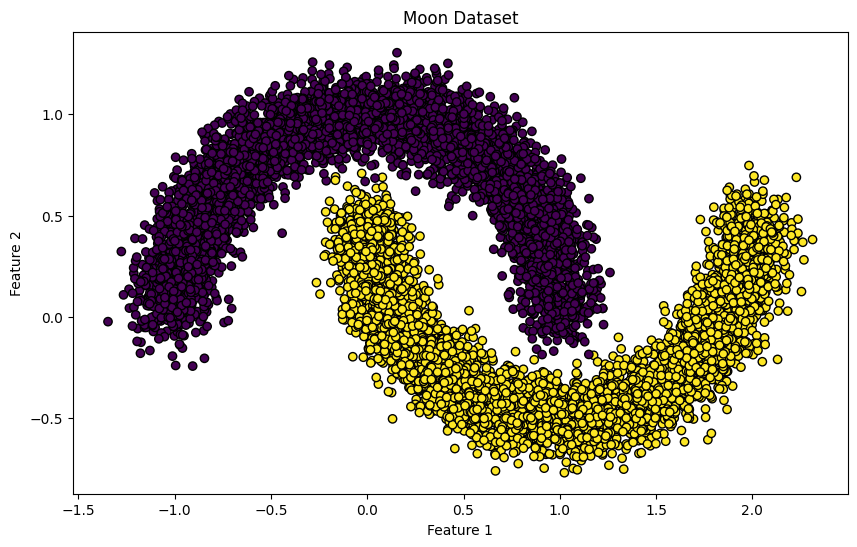

In [3]:
# Plot the dataset
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.viridis, edgecolor='k')
plt.title("Moon Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0:5]

array([[-0.05239099, -0.74545067],
       [-1.383186  , -0.41381752],
       [-0.10023646,  1.07726476],
       [-1.5665963 , -0.22008852],
       [-1.64946923,  0.21830853]])

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [6]:
print("X_train.shape : ",X_train.shape)
print("X_test.shape : ",X_test.shape)
print("y_train.shape : ",y_train.shape)
print("y_test.shape : ",y_test.shape)

X_train.shape :  (8000, 2)
X_test.shape :  (2000, 2)
y_train.shape :  (8000,)
y_test.shape :  (2000,)


In [7]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Model_selu

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, AlphaDropout

model_selu = Sequential()

model_selu.add(Dense(16, activation='selu', input_dim=2))
model_selu.add(Dense(32, activation='selu'))
model_selu.add(Dense(1, activation='sigmoid'))

model_selu.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 625 (2.44 KB)

 Trainable params: 625 (2.44 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model_selu.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
history=model_selu.fit(X_train,y_train,batch_size=16,epochs=50,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8641 - loss: 0.3059 - val_accuracy: 0.9150 - val_loss: 0.2046
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9021 - loss: 0.2198 - val_accuracy: 0.9445 - val_loss: 0.1490
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9443 - loss: 0.1437 - val_accuracy: 0.9850 - val_loss: 0.0806
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9836 - loss: 0.0757 - val_accuracy: 0.9950 - val_loss: 0.0372
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9964 - loss: 0.0369 - val_accuracy: 0.9990 - val_loss: 0.0232
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9983 - loss: 0.0214 - val_accuracy: 0.9980 - val_loss: 0.0149
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9986 - loss: 0.0138 - val_accuracy: 0.9990 - val_loss: 0.0094
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0096 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


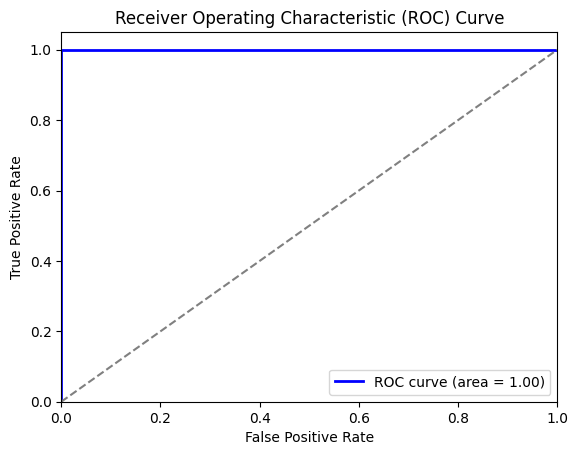

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
# Step 4: Predict probabilities
y_probs = model_selu.predict(X_test)

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Step 6: Calculate the AUC
auc = roc_auc_score(y_test, y_probs)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

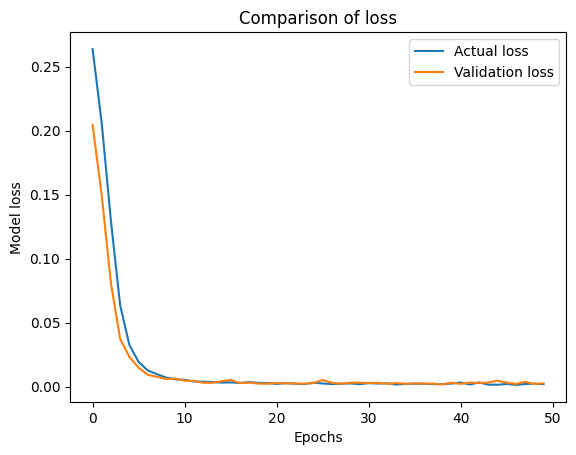

In [11]:
plt.plot(history.history['loss'], label='Actual loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Comparison of loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.show()

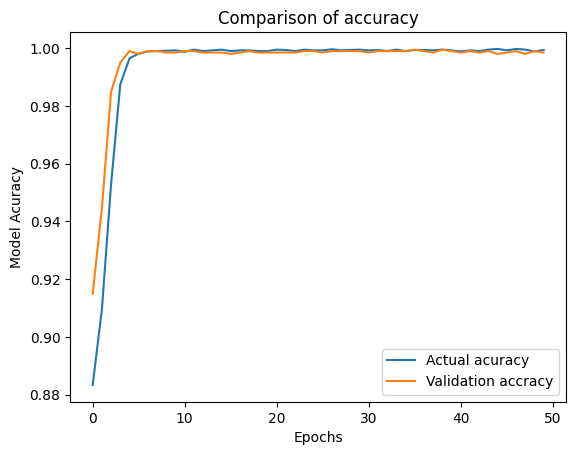

In [12]:
plt.plot(history.history['accuracy'], label='Actual acuracy')
plt.plot(history.history['val_accuracy'], label='Validation accracy')
plt.title('Comparison of accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Acuracy')
plt.show()

In [14]:
# Evaluate the model on test data
loss, accuracy = model_selu.evaluate(X_test, y_test)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9995 - loss: 0.0011    
Test Loss: 0.0026
Test Accuracy: 0.9985


##model selu with  drop outs

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model_selu_with_dropout = Sequential()

model_selu_with_dropout.add(Dense(16, activation='selu', input_dim=2))
model_selu_with_dropout.add(Dropout(0.1))  # Replacing Alpha Dropout with standard Dropout

model_selu_with_dropout.add(Dense(32, activation='selu'))
model_selu_with_dropout.add(Dropout(0.1))  # Replacing Alpha Dropout with standard Dropout

model_selu_with_dropout.add(Dense(1, activation='sigmoid'))

model_selu_with_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history1 = model_selu_with_dropout.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8400 - loss: 0.3397 - val_accuracy: 0.9180 - val_loss: 0.2094
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8919 - loss: 0.2450 - val_accuracy: 0.9400 - val_loss: 0.1732
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9059 - loss: 0.2130 - val_accuracy: 0.9510 - val_loss: 0.1341
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9230 - loss: 0.1781 - val_accuracy: 0.9570 - val_loss: 0.1062
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9353 - loss: 0.1523 - val_accuracy: 0.9705 - val_loss: 0.0822
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9410 - loss: 0.1420 - val_accuracy: 0.9695 - val_loss: 0.0738
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9434 - loss: 0.1329 - val_accuracy: 0.9740 - val_loss: 0.0647
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9474 - loss: 0.1280 - val_accuracy: 0.

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


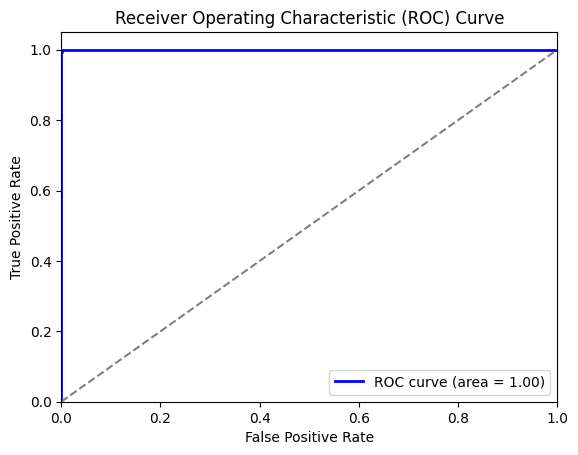

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
# Step 4: Predict probabilities
y_probs = model_selu_with_dropout.predict(X_test)

# Step 5: Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Step 6: Calculate the AUC
auc = roc_auc_score(y_test, y_probs)

# Step 7: Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

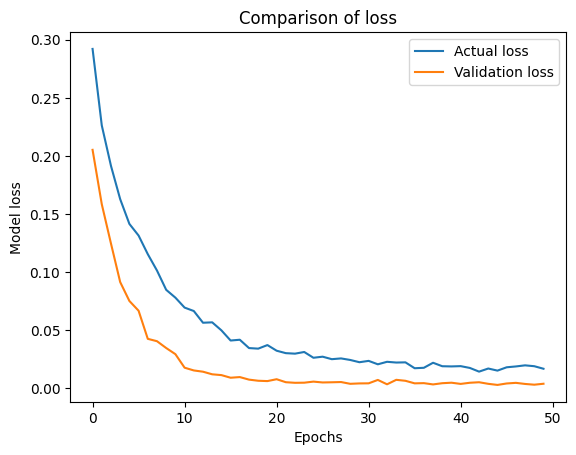

In [20]:
plt.plot(history1.history['loss'], label='Actual loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
plt.title('Comparison of loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model loss')
plt.show()

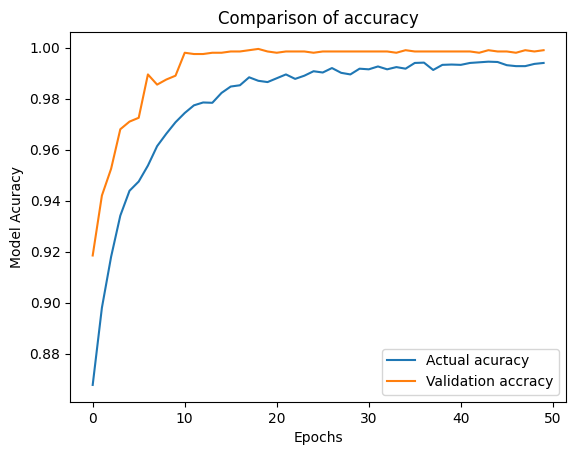

In [21]:
plt.plot(history1.history['accuracy'], label='Actual acuracy')
plt.plot(history1.history['val_accuracy'], label='Validation accracy')
plt.title('Comparison of accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Model Acuracy')
plt.show()